# Misure preliminari

### Updated to 08 Janaury 2024

### Linearità del discriminatore

In [1]:
#LIBRERIE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import uproot

#PARAMTERI
DELTA_T = 50 * 10 ** (-9) #s
MIN_TEST = 5 #min
SECONDI_TEST = MIN_TEST * 60 #s

#COSTANTI
FIGSIZE_1_1 = (10, 6)
FIGSIZE_3_1 = (10, 18)
FIGSIZE_3_2 = (18, 12)

FONT = "DejaVu Sans"
FONT_DIM = [12,15,18,21,27]
MARKER_SIZE = 4
LINE_WIDTH = 1.5
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.8


COLORI_BIN = ["tab:blue", "tab:red"]
COLORI_DUE = ["tab:blue", "tab:orange"]
COLORI_TRE = ["tab:blue", "tab:green", "tab:red"]
COLORI_ARC = ["tab:purple", "tab:blue", "tab:green", "tab:olive", "tab:orange", "tab:red"]
COLORI_ARC_10 = ["maroon", "tab:red","darkorange" ,"darkgoldenrod", "tab:olive", "tab:green", "teal", "tab:blue", "tab:purple", "darkmagenta"]


CARTELLA_IMMAGINI = "Immagini/"
ESPORTA_IMMGAGINI = True
FORMATO_IMMAGINI = ".pdf"
DPI = 300

#FONT (LaTeX)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

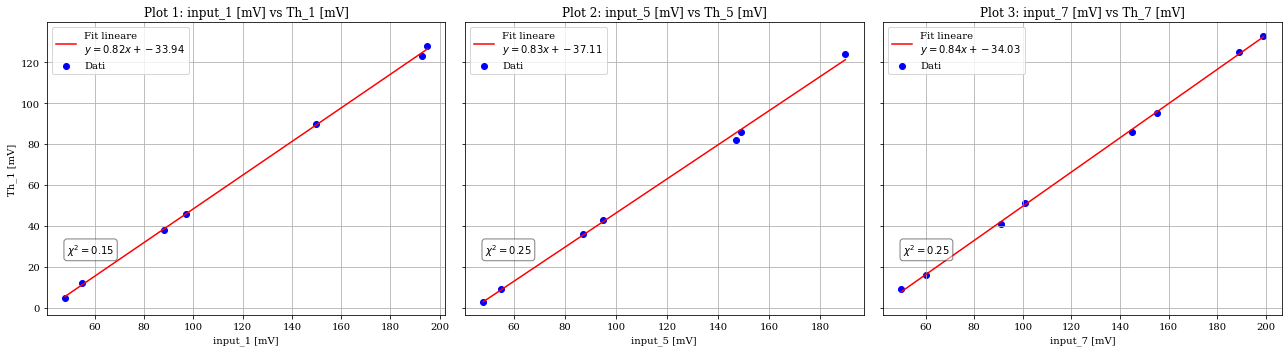

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Disattiva LaTeX
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

data_discriminatore = {
'input_1 [mV]' :    [48, 55, 88 ,97, 150, 193, 195],
'Th_1 [mV]':        [5, 12, 38, 46, 90, 123, 128, ],
'input_5 [mV]' :    [48, 55, 87, 95, 147, 149, 190],
'Th_5 [mV]':        [3 , 9, 36, 43, 82, 86, 124],
'input_7 [mV]' :    [50, 60, 91, 101, 145, 155, 189 ,199],
'Th_7 [mV]':        [9, 16, 41, 51, 86 ,95, 125, 133],
}

# Prepara i dati
inputs = ['input_1 [mV]', 'input_5 [mV]', 'input_7 [mV]']
thresholds = ['Th_1 [mV]', 'Th_5 [mV]', 'Th_7 [mV]']

# Imposta i plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop attraverso i dati per ciascun grafico
for i, (ax, input_key, th_key) in enumerate(zip(axes, inputs, thresholds)):
    x = np.array(data_discriminatore[input_key])
    y = np.array(data_discriminatore[th_key])

    # Fit lineare
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    fit_line = slope * x + intercept

    # Calcolo del chi quadro
    residuals = y - fit_line
    chi_squared = np.sum((residuals ** 2) / fit_line)

    # Plot dei dati e del fit
    ax.scatter(x, y, label="Dati", color="blue")
    ax.plot(x, fit_line, label=f"Fit lineare\n$y = {slope:.2f}x + {intercept:.2f}$", color="red")

    # Mostra il chi quadro sul plot
    ax.text(0.05, 0.25, f"$\chi^2 = {chi_squared:.2f}$", transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

    # Titolo e label
    ax.set_title(f"Plot {i+1}: {input_key} vs {th_key}")
    ax.set_xlabel(input_key)
    ax.set_ylabel(th_key if i == 0 else "")
    ax.legend()
    ax.grid()

# Mostra i plot
plt.tight_layout()
plt.show()


In [ ]:
#rivelatore 2
#2 minuti
data_sovrapposizione = {
'eventi' :          [3933 ,3921, 3952 , 4020, 3915, ],
'coincidenze':      [0 ,3903, 3935 , 3996, 3901,  ],
'overlap [ns]' :    [0 , 1, 3, 5, 7, 9],
}